In [1]:
import keras
import tensorflow as tf
import numpy as np

Using TensorFlow backend.


In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.2):
      print("\nReached 80% accuracy so cancelling training!")
      self.model.stop_training = True

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [0]:
(training_images, training_labels), (testing_images, testing_labels) = fashion_mnist.load_data()

In [0]:
import matplotlib.pyplot as plt

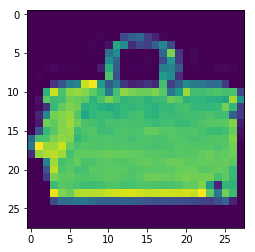

In [11]:
plt.imshow(training_images[99])

In [0]:
training_images = training_images/255.0

In [0]:
testing_images = testing_images/255.0

In [0]:
callbacks = myCallback()

In [0]:
model = keras.Sequential()

In [0]:
model.add(keras.layers.Flatten())

In [0]:
model.add(keras.layers.Dense(512, activation='relu'))

In [0]:
#model.add(keras.layers.Dense(128, activation='relu'))

In [0]:
model.add(keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [133]:
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.1451 - acc: 0.9456

Reached 80% accuracy so cancelling training!


In [127]:
  model.evaluate(testing_images, testing_labels)

10000/10000 [==============================] - 1s 54us/step


[0.35884036165475847, 0.8928]

In [108]:
classifications = model.predict(testing_images)

print(classifications[9]) 

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [63]:
print(testing_labels[9]) 

7
